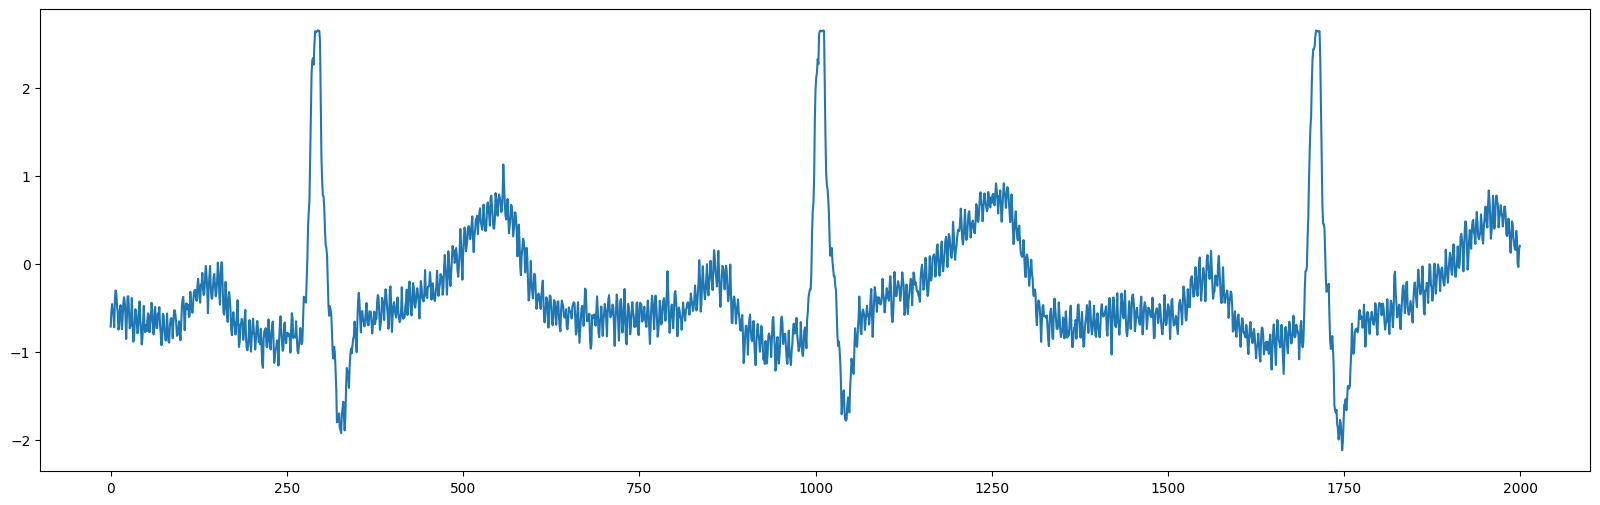

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Replace 'your_float_data_file.dat' with the actual file path.
file_path = '../Data/ECG3.dat'

# Initialize an empty list to store the read float data.
ECG_data = []

# Open the DAT file and read its contents.
try:
    with open(file_path, 'r') as file:
        for line in file:
            # Split the line into individual values based on spaces or newline characters.
            values = line.strip().split()
            
            # Convert each value to a float and append it to the list.
            for value in values:
                try:
                    float_value = float(value)
                    ECG_data.append(float_value)
                except ValueError:
                    print(f"Skipping non-float value: {value}")

except FileNotFoundError:
    print(f"File '{file_path}' not found.")
    exit()
ECG_data = np.array(ECG_data)[:2000]
plt.figure(figsize=(20, 6))
plt.plot(ECG_data)
plt.show()

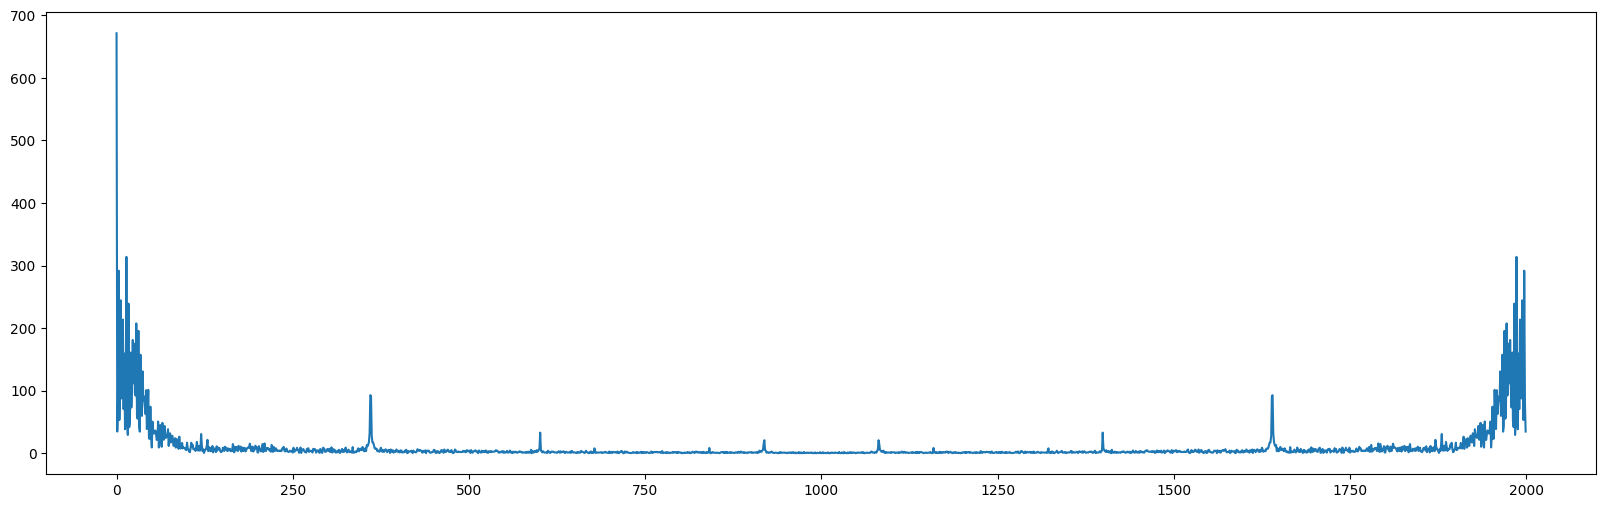

In [18]:
# plot frequency domain representation of the signal

# Compute the Fast Fourier Transform (FFT).
fft = np.fft.fft(ECG_data)
# Compute the frequency values.
fft_freq = np.abs(fft)
# Generate the frequency range.
plt.figure(figsize=(20, 6))
plt.plot(fft_freq)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
# Define FIR low pass filter.
def fir_low_pass_filter(data, cutoff, fs, order):
    # Calculate Nyquist frequency.
    nyq = fs / 2
    # Calculate FIR coefficients.
    b = signal.firwin(order, cutoff / nyq , window='hamming')
    # Apply filter to data.
    return signal.lfilter(b, 1, data)


In [20]:
# Define FIR high pass filter.
def fir_high_pass_filter(data, cutoff, fs, order):
    # Calculate Nyquist frequency.
    nyq = fs / 2
    # Calculate FIR coefficients.
    b = signal.firwin(order, cutoff / nyq , window='hamming', pass_zero=False)
    # Apply filter to data.
    return signal.lfilter(b, 1, data)


In [21]:

filtered_ecg = fir_low_pass_filter(ECG_data, 100, 1000, 100)
filtered_ecg = fir_high_pass_filter(filtered_ecg, 0.05 , 1000, 99)

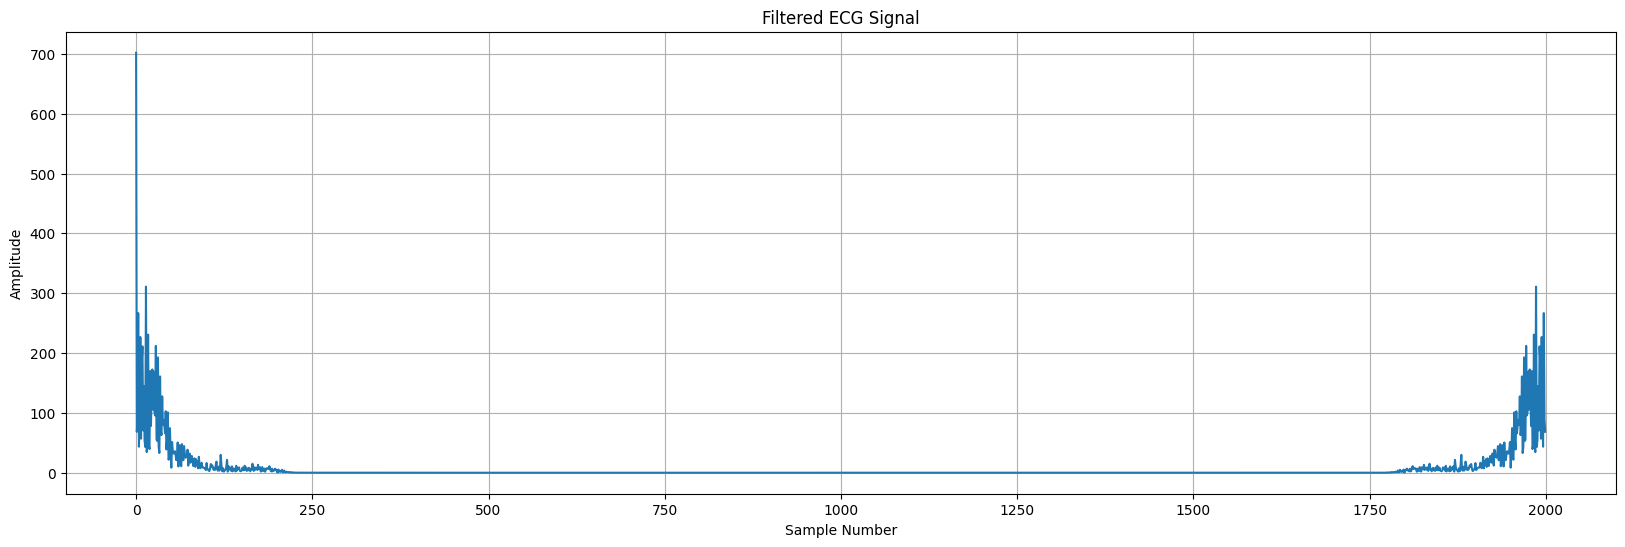

In [22]:
#plot the filtered signal
plt.figure(figsize=(20, 6))
plt.plot(np.abs(np.fft.fft(filtered_ecg)))
plt.title('Filtered ECG Signal')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.grid(True)

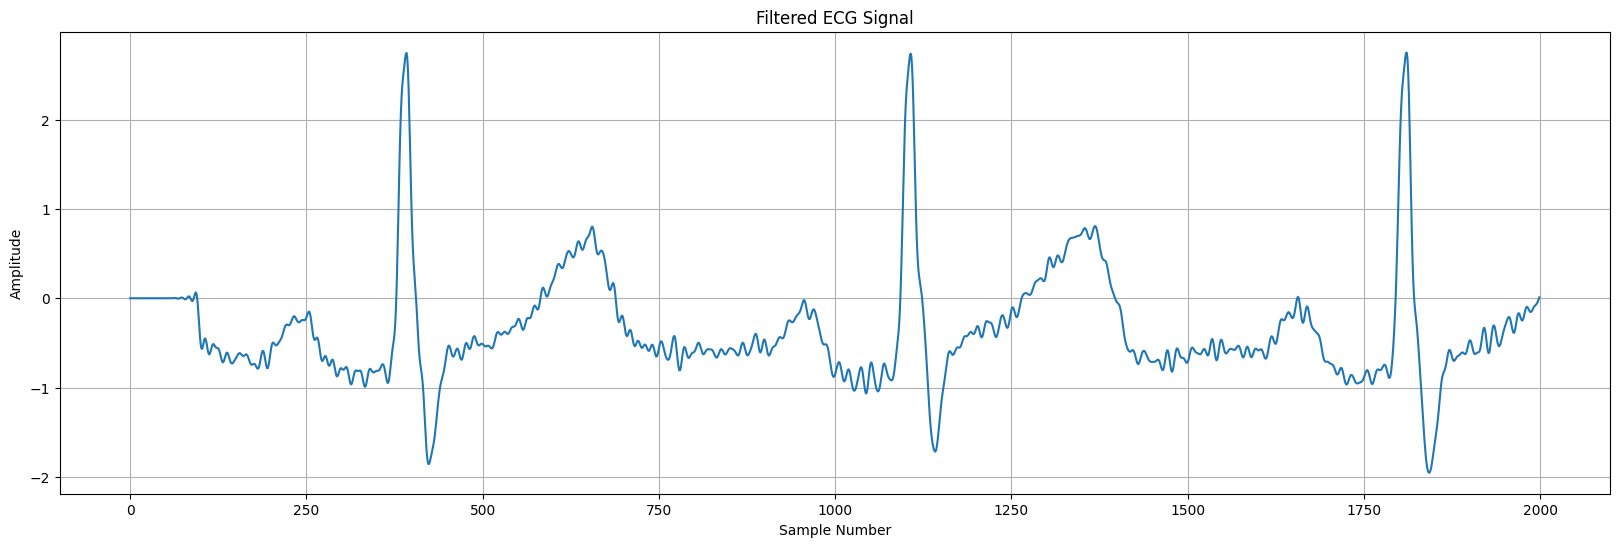

In [23]:
#plot the filtered signal
plt.figure(figsize=(20, 6))
plt.plot(filtered_ecg)
plt.title('Filtered ECG Signal')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.grid(True)
